
# Fall 2022 Data Science Intern Challenge 
Jason Robinson


**Question 1**: 
On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

- Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
- What metric would you report for this dataset?
- What is its value?


In [106]:
# Import required libraries for tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [107]:
# Bring in our dataset
shopify = pd.read_csv('/Users/jasonrobinson/Downloads/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv', parse_dates=['created_at'])
shopify.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 04:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11


In [108]:
# Get info on data
shopify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        5000 non-null   int64         
 1   shop_id         5000 non-null   int64         
 2   user_id         5000 non-null   int64         
 3   order_amount    5000 non-null   int64         
 4   total_items     5000 non-null   int64         
 5   payment_method  5000 non-null   object        
 6   created_at      5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 273.6+ KB


In [109]:
# Take a look at our summary statistics
shopify.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


>Looking at our statistics we can see that the median value of 284 falls within the 50th percent quartile, which is considered a more statistically significant metric than AOV.

In [110]:
# Confirm mean and median values
print('AOV/Mean:',shopify['order_amount'].mean())
print('Median Value:', shopify['order_amount'].median())

AOV/Mean: 3145.128
Median Value: 284.0


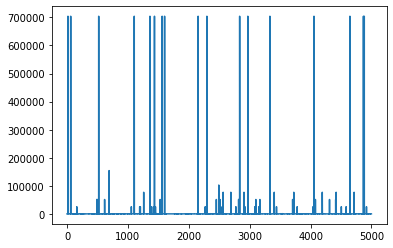

In [111]:
# Quick visualization
plt.plot(shopify['order_amount']);

***
***

**A**.	Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

>**Possible issues**: 
- Error in reporting, miscalculation of input – human error
- Duplicated values
- Fraudulent Activity

Let's start by taking a quick look at the order_amount observations. 

In [112]:
# Sort values and look at first 20 in descending order
shopify.sort_values(by='order_amount', ascending=False).head(20)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 04:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 04:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 04:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 04:00:00


We see much information of the outliers within our dataset. We have noted that an order is placed consistently for 2000 items, totalling an order amount for 704000, an alarming number indeed. 

We can now lookup the user_id and created_at observations to see that this is not of a single occurrence. 

We see that user_id 42 conducted the sale of 2000 items, for 17 times during a 30-day interval, using a credit card, at the exact time on different days, except for on 2017-03-28, in which 3 transactions occurred simultaneously at 4:00:00 for order ids 2836, 2970, and 4057. These attributes raise many red flags, and I would label these transactions as **Fraudulent Activity**. 

In [113]:
# All instances by user id 607 sorted by date
userid = shopify[shopify['user_id'] == 607].sort_values(by='created_at', ascending=True)
userid

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 04:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00


Other values of significance derive from Shop ID 78 where 3 sneakers totaled to 77175 which would be 25726 for one pair, an extraordinarily exorbitant amount. However, there appears to be no signs of any abnormalities other than the amount, so here I would confirm that the distributed values are the actual price of a single model of shoe, which is unlikely. Until confirmed I would consider these transactions as **Fraudulent Activity as well**.

In [114]:

shopid = shopify[shopify['order_amount'] > 2000].sort_values(by='order_amount', ascending=False)
shopid

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 04:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00
2969,2970,42,607,704000,2000,credit_card,2017-03-28 04:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 04:00:00
...,...,...,...,...,...,...,...
1452,1453,78,812,25725,1,credit_card,2017-03-17 18:09:54
2773,2774,78,890,25725,1,cash,2017-03-26 10:36:43
2270,2271,78,855,25725,1,credit_card,2017-03-14 23:58:22
2548,2549,78,861,25725,1,cash,2017-03-17 19:36:00


#### In Summary:
    
Using the application of AOV as a metric for accurate analysis is an error, as higher values such as the ones in this dataset, are far away from the Mean and will not give a good respresentation of the data. A better metric for this case would be to use the Median of 284, which gives us a value closer to what we would expect.

Providing a confirmation that a single shoe is not selling for over 25000, we can conclude that, along with User ID 607, all of these transactions are highly likely representative of fraudulent activity. 

***
***

**Question 2**: For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

#### A.	How many orders were shipped by Speedy Express in total?

    SELECT COUNT(*) 
    FROM orders 
    WHERE ShipperID = 1;
    
    
    Return: 54

***
***


#### B. What is the last name of the employee with the most orders?


    SELECT LastName 
    FROM employees
    WHERE EmployeeID IN (SELECT EmployeeID FROM orders 
    GROUP BY   EmployeeID ORDER BY COUNT(*) DESC LIMIT 1);


    Return: Peacock


***
***

#### C.	What product was ordered the most by customers in Germany?

    SELECT Products.ProductName, Sum(OrderDetails.Quantity) as most_ordered FROM Orders,
    JOIN OrderDetails ON Orders.OrderID = OrderDetails.OrderID
    JOIN Customers ON Orders.CustomerID = Customers.CustomerID
    JOIN Products ON OrderDetails.ProductID = Products.ProductID
    WHERE Country = 'Germany'
    GROUP BY Products.ProductName ORDER BY most_ordered DESC LIMIT 1;
    
    
    Return: Boston Crab Meat 160 products ordered

***
***

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>



REPORT CONCLUDED